In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


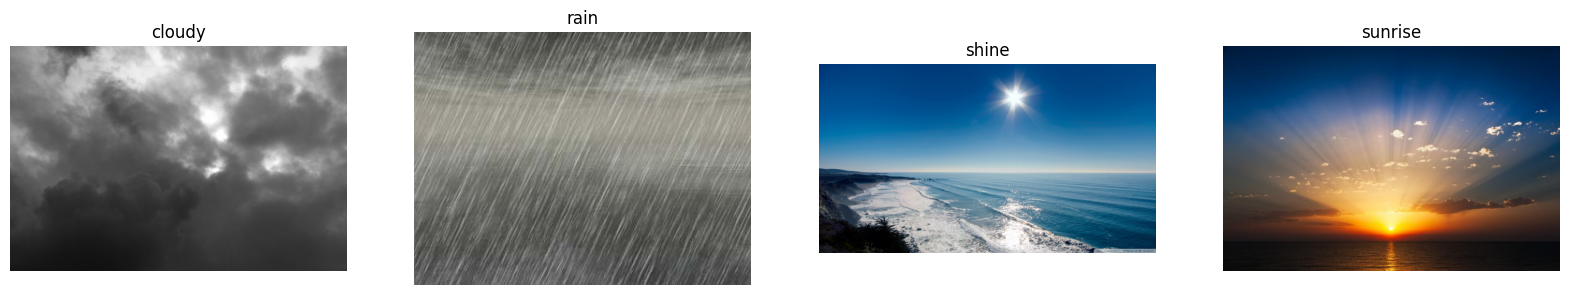

Found 847 images belonging to 4 classes.
Found 278 images belonging to 4 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36

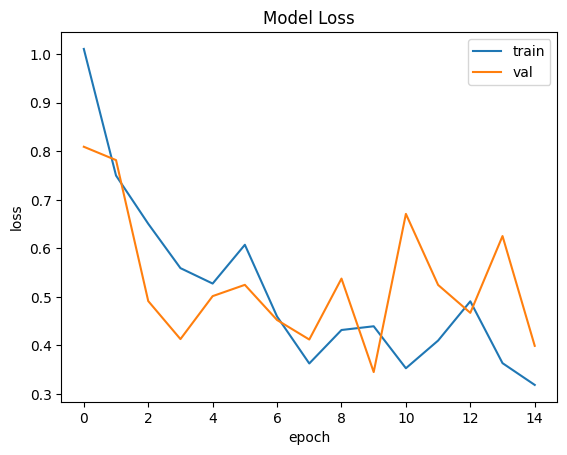

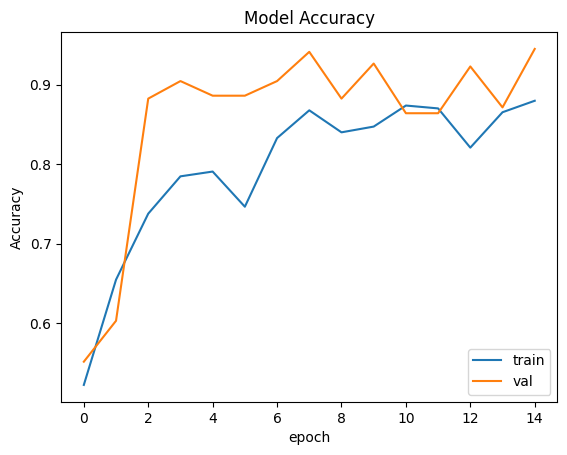

In [7]:
#MWD dataset

# Define the path to your dataset
dataset_path = './data/MWD/train'  # Adjust the path accordingly

# Define common image file extensions
image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif'}

# List the categories
categories = [cat for cat in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cat))]

# Load one image from each category to visualize
fig, axes = plt.subplots(1, len(categories), figsize=(20, 5))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    image_file = next((f for f in os.listdir(category_path) if os.path.splitext(f)[1].lower() in image_extensions), None)
    if image_file:
        image_path = os.path.join(category_path, image_file)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis('off')

plt.show()


# Define image dimensions and batch size
img_width, img_height = 150, 150  # Example dimensions, can be adjusted
batch_size = 16

# ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # Normalizing pixel values
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)  # Only rescaling for test data

# Load images from directories and apply transformations
train_generator = train_datagen.flow_from_directory(
    './data/MWD/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    './data/MWD/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


# Model configuration
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images

# Define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add fully connected layers
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))  # Assuming 4 classes in the dataset
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch= 847 // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=278 // batch_size)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

def plot_loss_curve(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    return

def plot_accuracy_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()
    return

plot_loss_curve(history)
plot_accuracy_curve(history)


In [2]:
#ACDC dataset
import os
import shutil

# Set the path to the folder containing the images
folder_path = './data/ACDC/'

# Define the labels
labels = ['clear', 'fog', 'rain', 'night', 'snow']

# Create the directories if they don't exist
for label in labels:
    os.makedirs(os.path.join(folder_path, label), exist_ok=True)

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a PNG image
    if filename.endswith('.png'):
        # Determine the label of the file
        for label in labels:
            if label in filename:
                # Move the file to the corresponding directory
                shutil.move(os.path.join(folder_path, filename), 
                            os.path.join(folder_path, label, filename))
                break


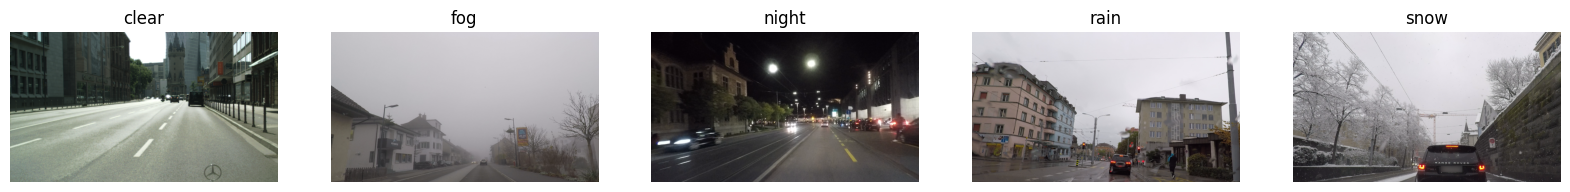

Found 1400 files belonging to 5 classes.
Using 924 files for training.
Found 1400 files belonging to 5 classes.
Using 476 files for validation.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 61, 61, 32)        0         
                                          

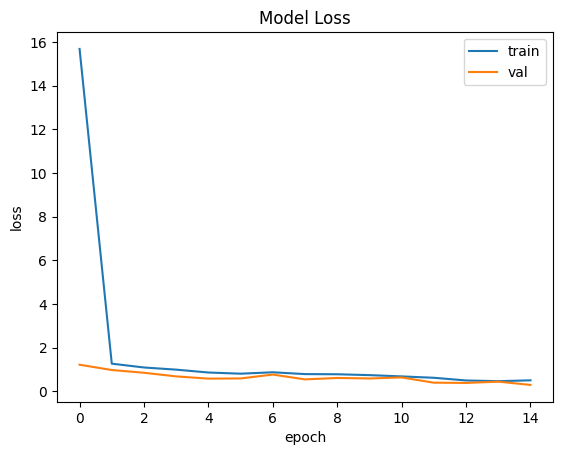

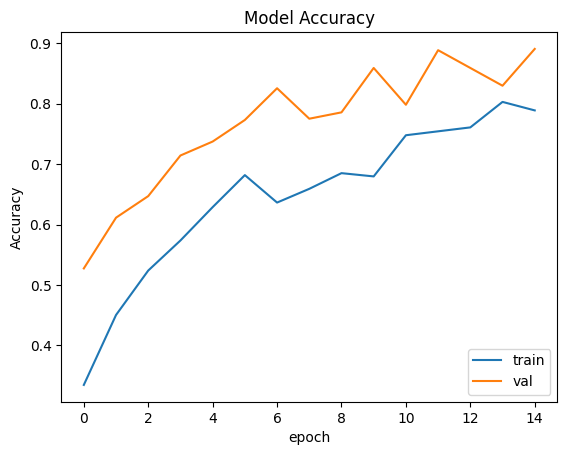

In [5]:
#ACDC  dataset
# Define common image file extensions
image_extensions = {'.png'}

dataset_path = './data/ACDC/'

# List the categories
categories = [cat for cat in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cat))]

# Load one image from each category to visualize
fig, axes = plt.subplots(1, len(categories), figsize=(20, 5))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    image_file = next((f for f in os.listdir(category_path) if os.path.splitext(f)[1].lower() in image_extensions), None)
    if image_file:
        image_path = os.path.join(category_path, image_file)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis('off')

plt.show()

batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.34,
    subset='training',
    image_size=(128, 128),
    crop_to_aspect_ratio=False)

val_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    seed=42,
    validation_split=0.34,
    subset='validation',
    image_size=(128, 128), 
    crop_to_aspect_ratio=False)

# Model configuration
img_width, img_height = 128, 128
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images

# Define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add fully connected layers
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))  # Assuming 4 classes in the dataset
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

# Model summary
model.summary()

train_steps = int(tf.data.experimental.cardinality(train_dataset).numpy())

test_steps = int(tf.data.experimental.cardinality(val_dataset).numpy())

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch= train_steps,
    epochs=15,
    validation_data=val_dataset,
    validation_steps=test_steps)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plot_loss_curve(history)
plot_accuracy_curve(history)

1/1 [==============================] - 0s 50ms/step


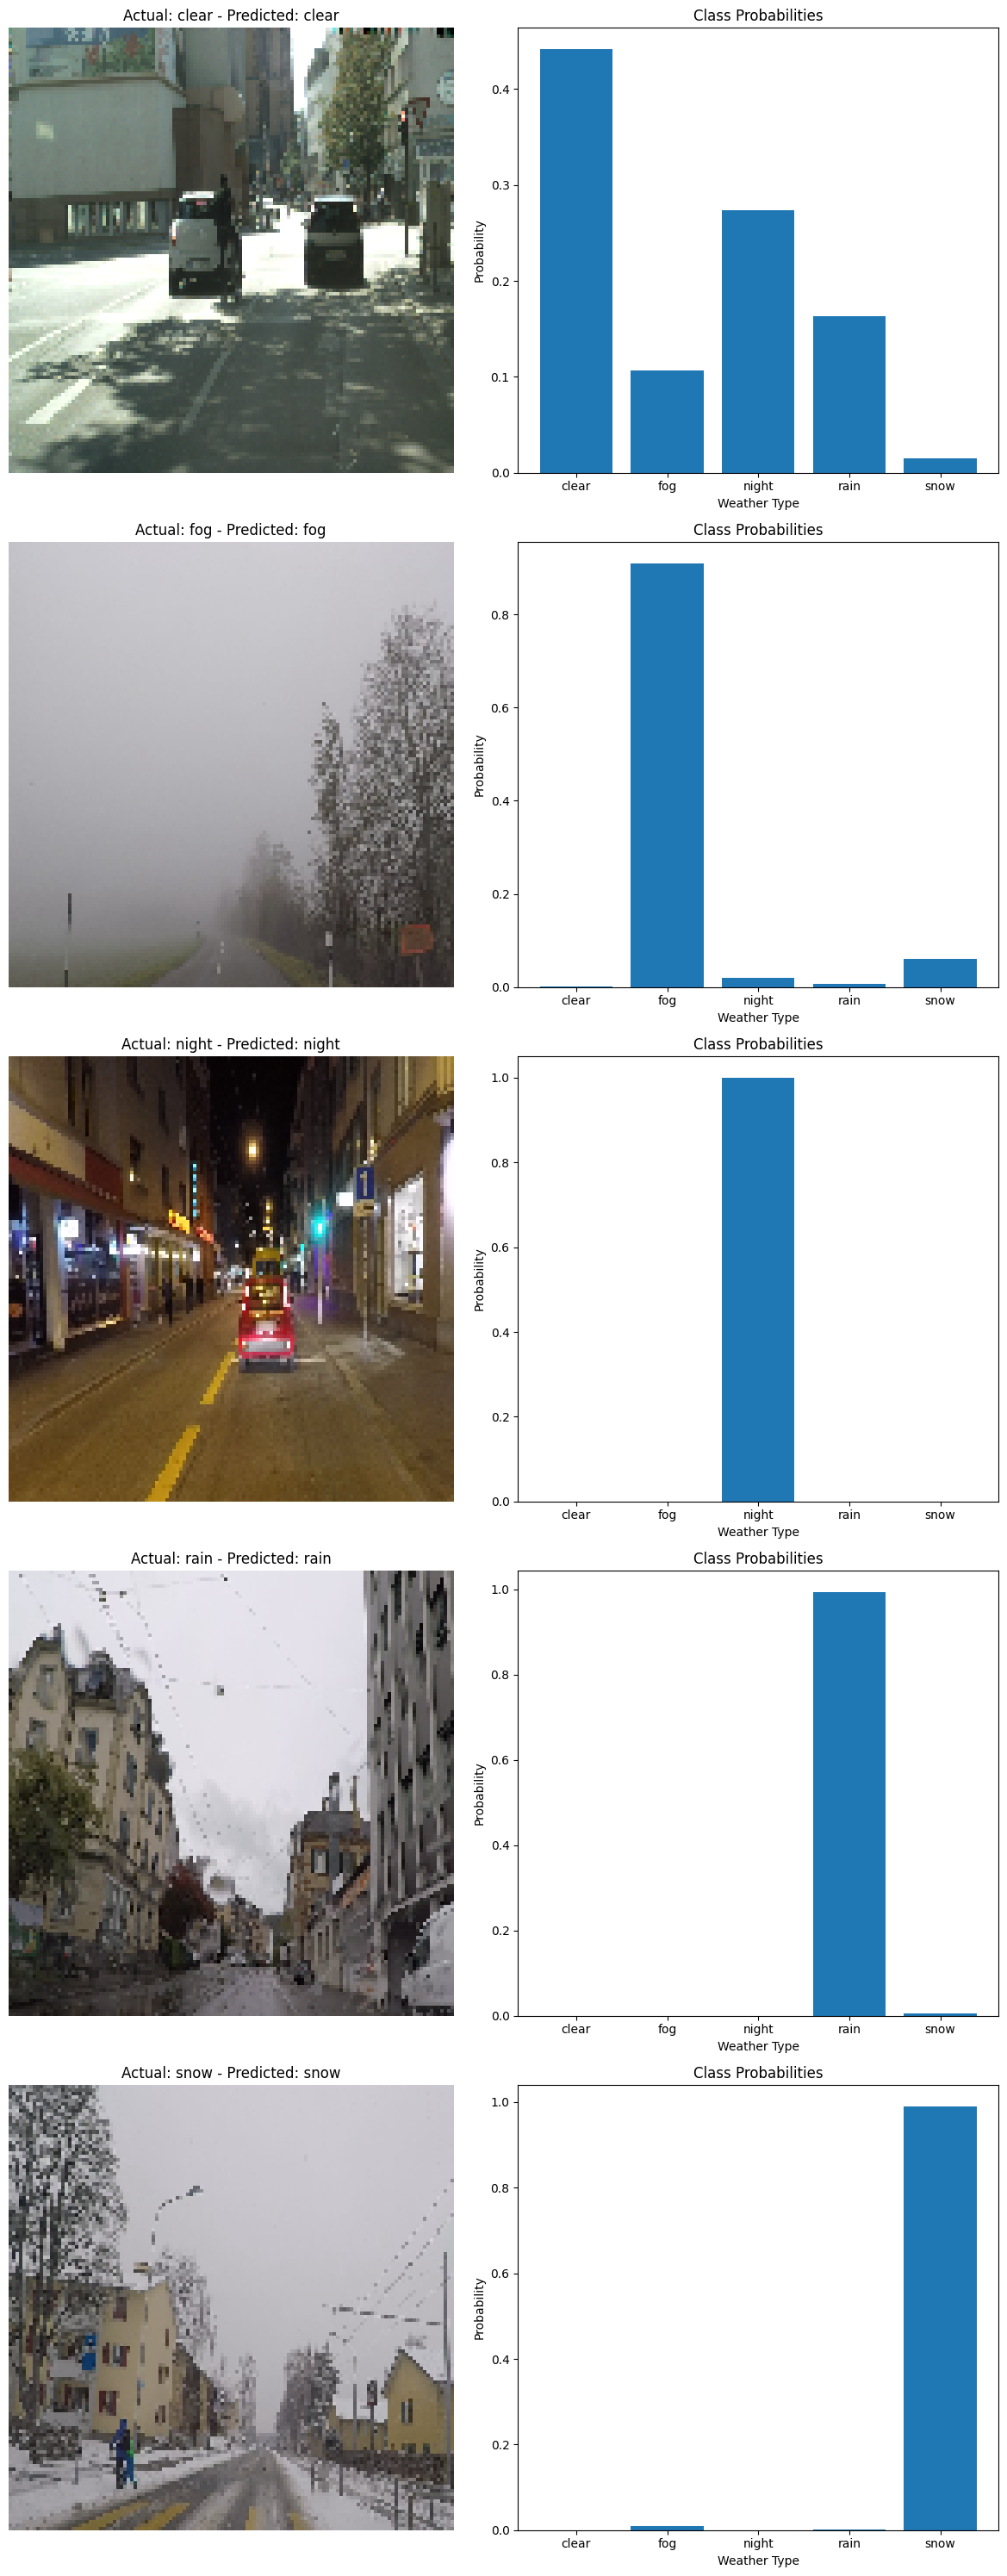

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def predict_weather(image_path, model, img_width, img_height, categories):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Predictions
    predictions = model.predict(img_array)
    predicted_class = categories[np.argmax(predictions[0])]
    class_probabilities = predictions[0]

    return predicted_class, class_probabilities

def plot_class_probabilities(probabilities, categories):
    plt.bar(categories, probabilities)
    plt.xlabel('Weather Type')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')

def display_images_with_predictions_and_probabilities(image_paths, actual_labels, model, img_width, img_height, categories):
    num_images = len(image_paths)
    plt.figure(figsize=(12, 6 * num_images))

    for i in range(num_images):
        image_path = image_paths[i]
        actual_label = actual_labels[i]

        # Display the image
        plt.subplot(num_images, 2, 2*i + 1)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
        plt.imshow(img)
        plt.axis('off')

        # Get predictions
        predicted_class, class_probabilities = predict_weather(image_path, model, img_width, img_height, categories)

        # Display actual and predicted labels
        plt.title(f'Actual: {actual_label} - Predicted: {predicted_class}')

        # Plotting the class probabilities
        plt.subplot(num_images, 2, 2*i + 2)
        plot_class_probabilities(class_probabilities, categories)

    plt.tight_layout()
    plt.show()

# Example usage for ACDC dataset
# Update these paths with actual paths and labels from your ACDC dataset
image_paths = ['./data/ACDC/clear/clear_04.png', './data/ACDC/fog/fog_404.png', 
               './data/ACDC/night/night_206.png', './data/ACDC/rain/rain_1008.png',
               './data/ACDC/snow/snow_303.png']
actual_labels = ['clear', 'fog', 'night', 'rain', 'snow']  # Replace with actual class names
categories = ['clear', 'fog', 'night', 'rain', 'snow']  # Replace with actual class names
display_images_with_predictions_and_probabilities(image_paths, actual_labels, model, img_width, img_height, categories)


In [27]:
#UAVID dataset
import os
import shutil

# Set the path to the folder containing the images
folder_path = './data/UAVid/'

# Define the labels
labels = ['day', 'fog', 'rain', 'night']

# Create the directories if they don't exist
for label in labels:
    os.makedirs(os.path.join(folder_path, label), exist_ok=True)

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a PNG image
    if filename.endswith('.png'):
        # Determine the label of the file
        for label in labels:
            if label in filename:
                # Move the file to the corresponding directory
                shutil.move(os.path.join(folder_path, filename), 
                            os.path.join(folder_path, label, filename))
                break


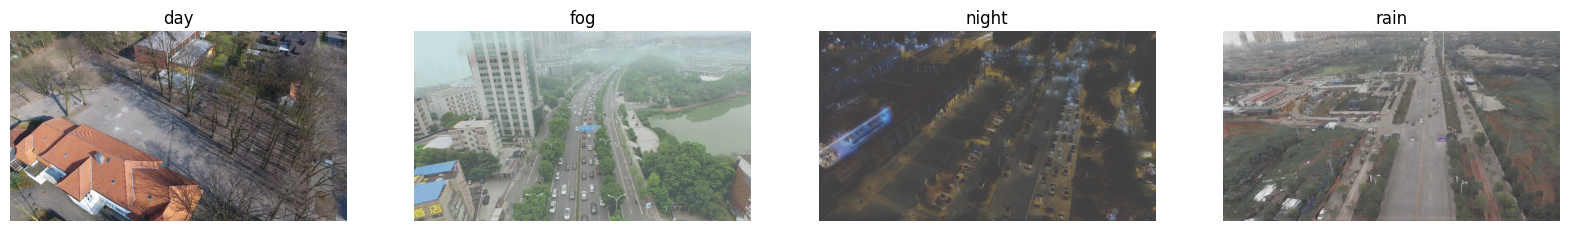

Found 103 files belonging to 4 classes.
Using 68 files for training.
Found 103 files belonging to 4 classes.
Using 35 files for validation.
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 126, 126, 8)       224       
                                                                 
 activation_185 (Activation  (None, 126, 126, 8)       0         
 )                                                               
                                                                 
 max_pooling2d_105 (MaxPool  (None, 63, 63, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_110 (Conv2D)         (None, 61, 61, 16)        1168      
                                                                 
 activation_186 (Activation  (None, 61, 61, 1

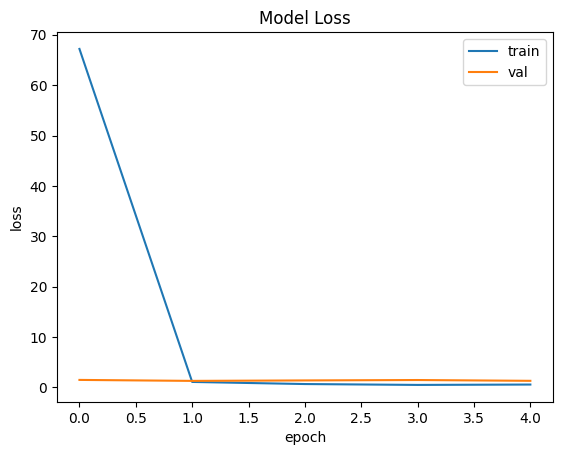

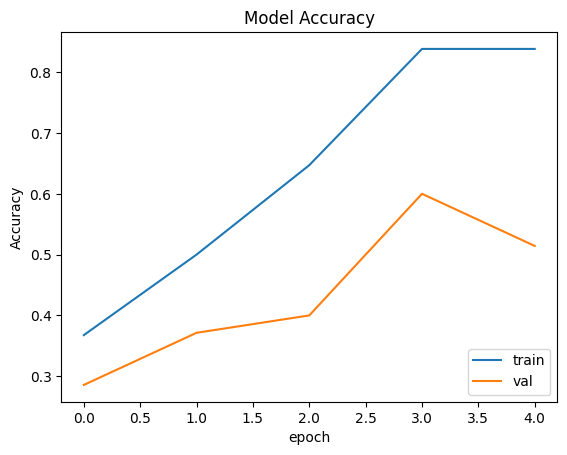

In [54]:
#UAVID dataset
# Define common image file extensions
image_extensions = {'.png'}

dataset_path = './data/UAVid/'

# List the categories
categories = [cat for cat in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cat))]

# Load one image from each category to visualize
fig, axes = plt.subplots(1, len(categories), figsize=(20, 5))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    image_file = next((f for f in os.listdir(category_path) if os.path.splitext(f)[1].lower() in image_extensions), None)
    if image_file:
        image_path = os.path.join(category_path, image_file)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis('off')

plt.show()

batch_size = 1

train_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.34,
    subset='training',
    image_size=(128, 128),
    crop_to_aspect_ratio=False)

val_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    seed=42,
    validation_split=0.34,
    subset='validation',
    image_size=(128, 128), 
    crop_to_aspect_ratio=False)

# Model configuration
img_width, img_height = 128, 128
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images

# Define a simple CNN model
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add fully connected layers
model.add(Flatten()) 
# model.add(Dense(32))
# model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))  # Assuming 4 classes in the dataset
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

# Model summary
model.summary()

train_steps = int(tf.data.experimental.cardinality(train_dataset).numpy())

test_steps = int(tf.data.experimental.cardinality(val_dataset).numpy())

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch= train_steps,
    epochs=5,
    validation_data=val_dataset,
    validation_steps=test_steps)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plot_loss_curve(history)
plot_accuracy_curve(history)

In [57]:
#Syndrone dataset
# Set the path to the folder containing the images
folder_path = './data/syndrone/'

# Define the labels
labels = ['ClearNight', 'ClearNoon', 'HardRainNoon', 'MidFoggyNoon']

# Create the directories if they don't exist
for label in labels:
    os.makedirs(os.path.join(folder_path, label), exist_ok=True)

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a PNG image
    if filename.endswith('.png'):
        # Determine the label of the file
        for label in labels:
            if label in filename:
                # Move the file to the corresponding directory
                shutil.move(os.path.join(folder_path, filename), 
                            os.path.join(folder_path, label, filename))
                break


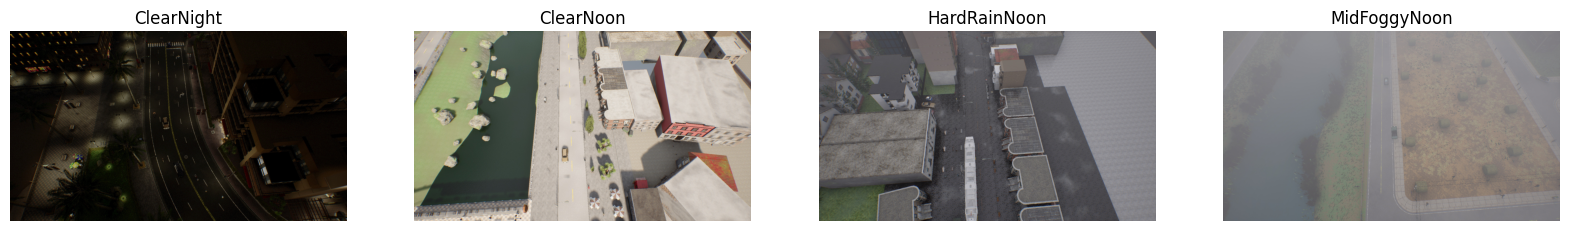

Found 1200 files belonging to 4 classes.
Using 792 files for training.
Found 1200 files belonging to 4 classes.
Using 408 files for validation.
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 126, 126, 8)       224       
                                                                 
 activation_203 (Activation  (None, 126, 126, 8)       0         
 )                                                               
                                                                 
 max_pooling2d_116 (MaxPool  (None, 63, 63, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_121 (Conv2D)         (None, 61, 61, 16)        1168      
                                                                 
 activation_204 (Activation  (None, 61, 6

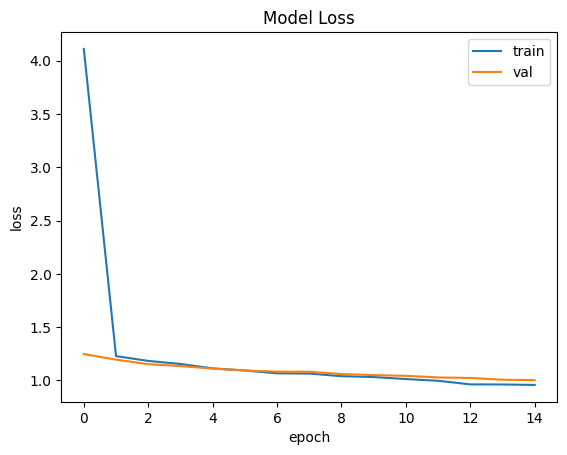

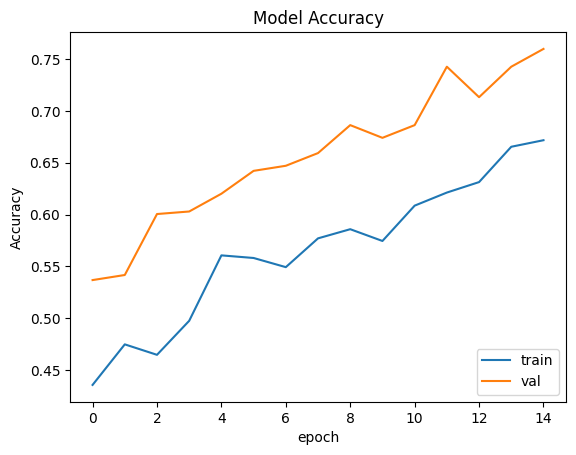

In [61]:
#Syndrone dataset
# Define common image file extensions
image_extensions = {'.png'}

dataset_path = './data/syndrone'

# List the categories
categories = [cat for cat in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cat))]

# Load one image from each category to visualize
fig, axes = plt.subplots(1, len(categories), figsize=(20, 5))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    image_file = next((f for f in os.listdir(category_path) if os.path.splitext(f)[1].lower() in image_extensions), None)
    if image_file:
        image_path = os.path.join(category_path, image_file)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis('off')

plt.show()

batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.34,
    subset='training',
    image_size=(128, 128),
    crop_to_aspect_ratio=False)

val_dataset = tf.keras.utils.image_dataset_from_directory(folder_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    seed=42,
    validation_split=0.34,
    subset='validation',
    image_size=(128, 128), 
    crop_to_aspect_ratio=False)

# Model configuration
img_width, img_height = 128, 128
input_shape = (img_width, img_height, 3)  # 3 channels for RGB images

# Define a simple CNN model
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add fully connected layers
model.add(Flatten()) 
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))  # Assuming 4 classes in the dataset
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics=['accuracy'])

# Model summary
model.summary()

train_steps = int(tf.data.experimental.cardinality(train_dataset).numpy())

test_steps = int(tf.data.experimental.cardinality(val_dataset).numpy())

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch= train_steps,
    epochs=15,
    validation_data=val_dataset,
    validation_steps=test_steps)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plot_loss_curve(history)
plot_accuracy_curve(history)

1/1 [==============================] - 0s 28ms/step


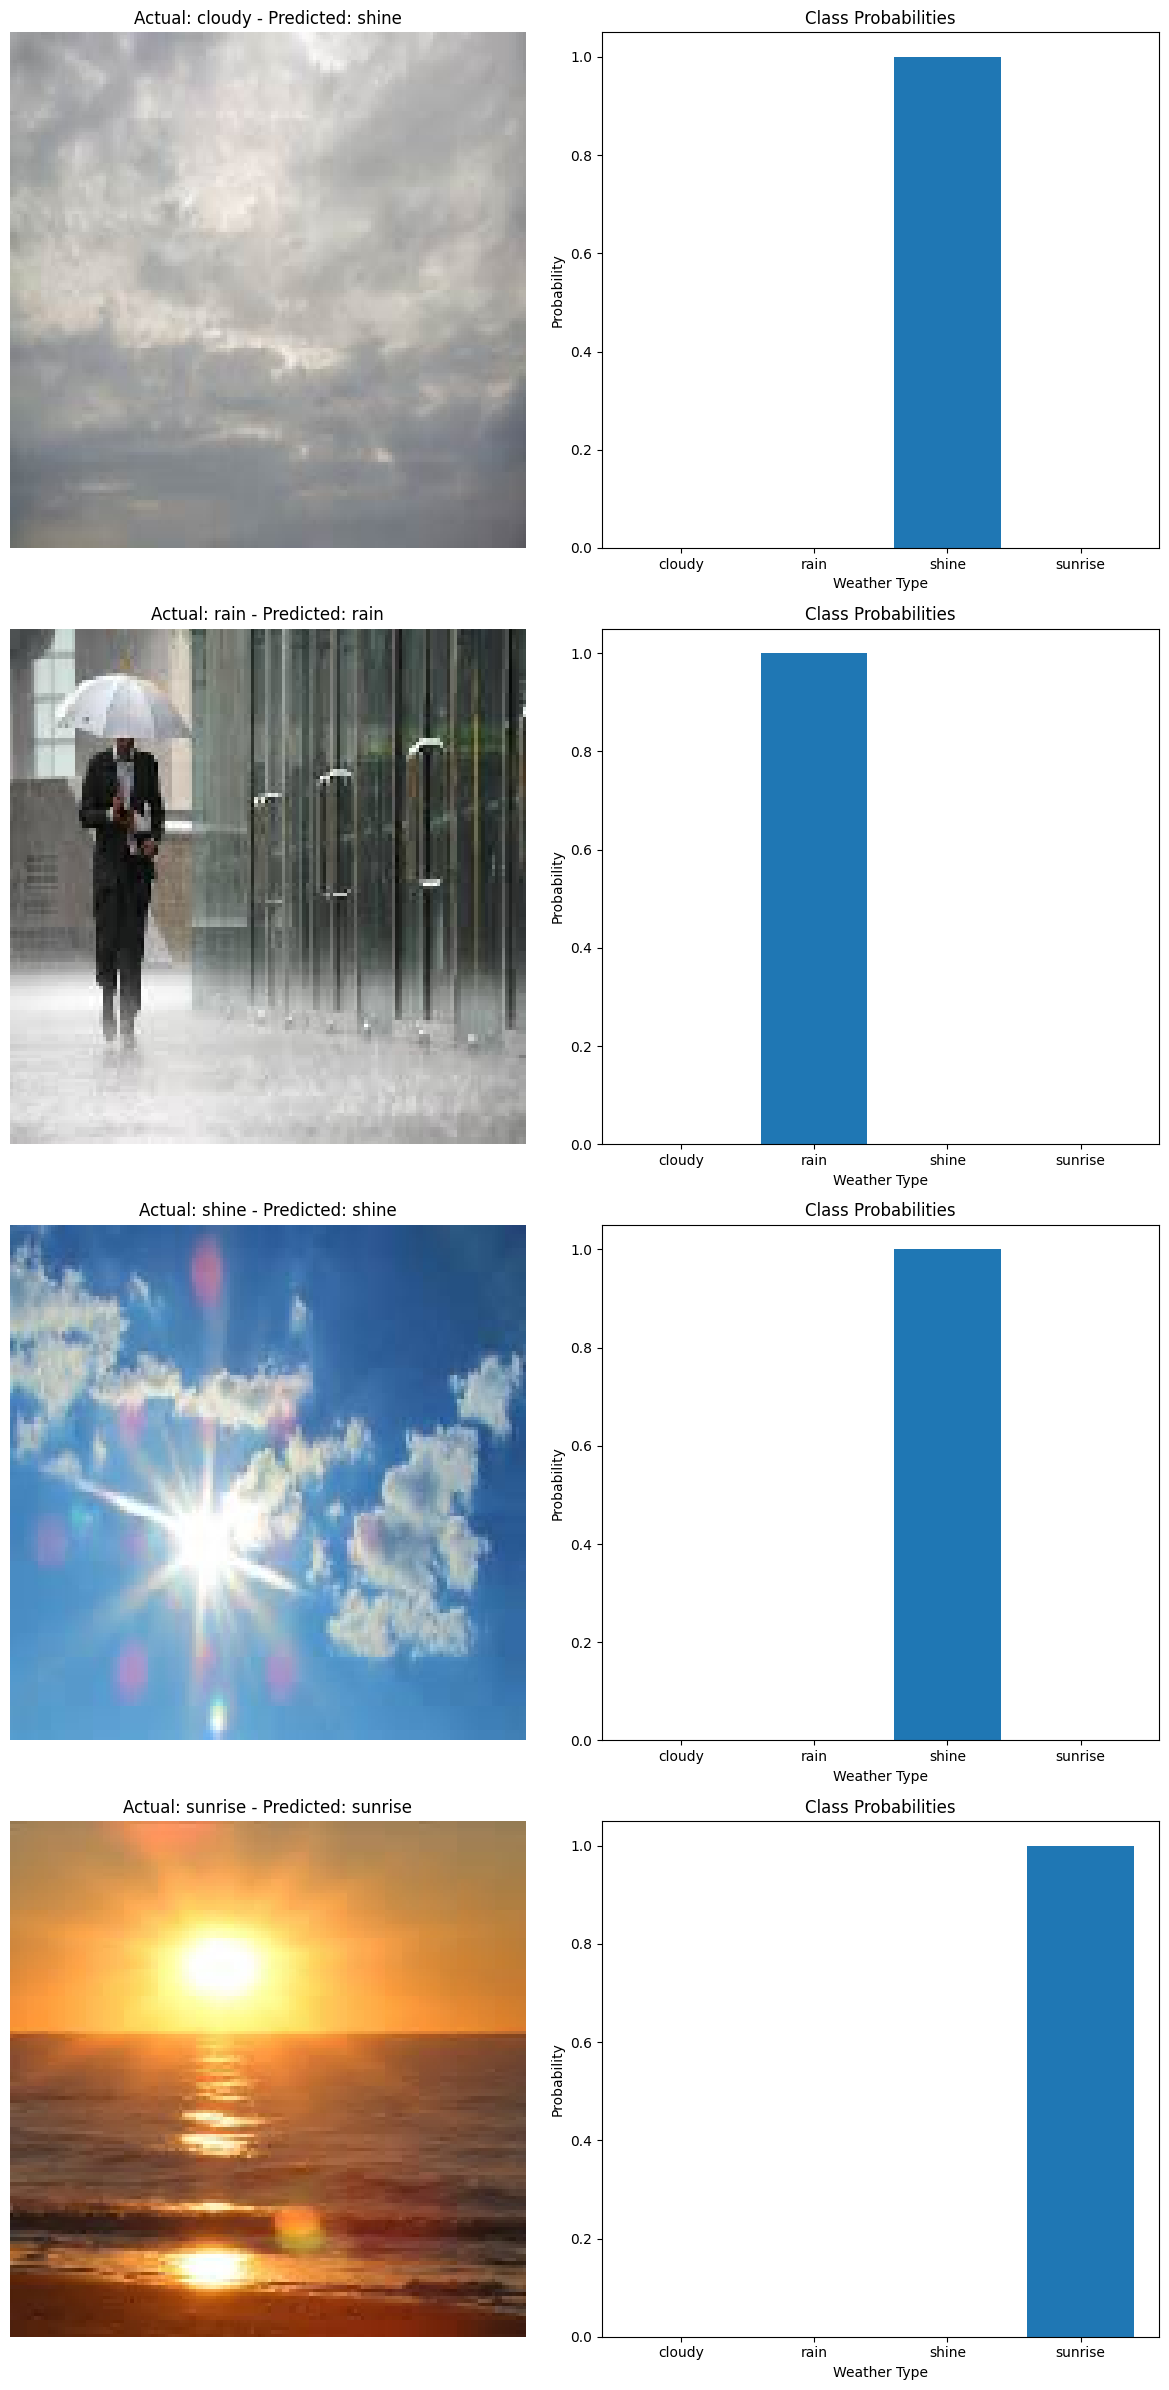

In [10]:
def predict_weather(image_path, model, img_width, img_height, categories):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Predictions
    predictions = model.predict(img_array)
    predicted_class = categories[np.argmax(predictions[0])]
    class_probabilities = predictions[0]

    return predicted_class, class_probabilities

def plot_class_probabilities(probabilities, categories):
    plt.bar(categories, probabilities)
    plt.xlabel('Weather Type')
    plt.ylabel('Probability')
    plt.title('Class Probabilities')

def display_images_with_predictions_and_probabilities(image_paths, actual_labels, model, img_width, img_height, categories):
    num_images = len(image_paths)
    plt.figure(figsize=(12, 6 * num_images))

    for i in range(num_images):
        image_path = image_paths[i]
        actual_label = actual_labels[i]

        # Display the image
        plt.subplot(num_images, 2, 2*i + 1)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
        plt.imshow(img)
        plt.axis('off')

        # Get predictions
        predicted_class, class_probabilities = predict_weather(image_path, model, img_width, img_height, categories)

        # Display actual and predicted labels
        plt.title(f'Actual: {actual_label} - Predicted: {predicted_class}')

        # Plotting the class probabilities
        plt.subplot(num_images, 2, 2*i + 2)
        plot_class_probabilities(class_probabilities, categories)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = ['./data/MWD/test/cloudy/cloudy230.jpg', './data/MWD/test/rain/rain166.jpg', 
               './data/MWD/test/shine/shine197.jpg ','./data/MWD/test/sunrise/sunrise277.jpg']
actual_labels = ['cloudy', 'rain', 'shine', 'sunrise']
display_images_with_predictions_and_probabilities(image_paths, actual_labels, model, img_width, img_height, categories)
